/var/folders/gx/mbhhwt6160z52kd_nkkqjtcr0000gn/T/ipykernel_8285/1216667871.py:38: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d')


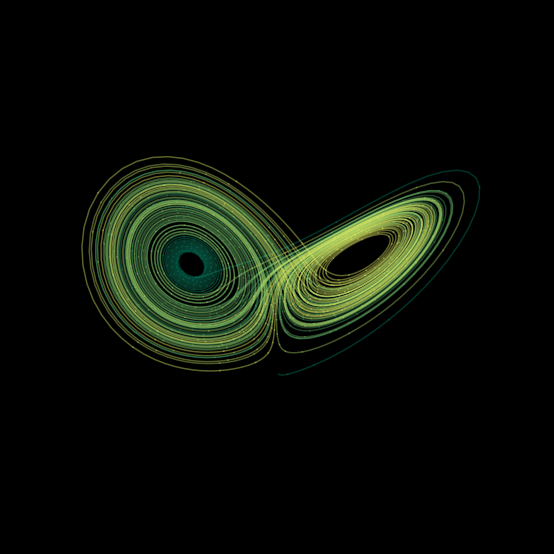

In [10]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Create an image of the Lorenz attractor.
# The maths behind this code is described in the scipython blog article
# at https://scipython.com/blog/the-lorenz-attractor/
# Christian Hill, January 2016.
# Updated, January 2021 to use scipy.integrate.solve_ivp.

WIDTH, HEIGHT, DPI = 1000, 750, 100

# Lorenz paramters and initial conditions.
sigma, beta, rho = 10, 2.667, 28
u0, v0, w0 = 0, 1, 1.05

# Maximum time point and total number of time points.
tmax, n = 100, 10000

def lorenz(t, X, sigma, beta, rho):
    """The Lorenz equations."""
    u, v, w = X
    up = -sigma*(u - v)
    vp = rho*u - v - u*w
    wp = -beta*w + u*v
    return up, vp, wp

# Integrate the Lorenz equations.
soln = solve_ivp(lorenz, (0, tmax), (u0, v0, w0), args=(sigma, beta, rho),
                 dense_output=True)
# Interpolate solution onto the time grid, t.
t = np.linspace(0, tmax, n)
x, y, z = soln.sol(t)

# Plot the Lorenz attractor using a Matplotlib 3D projection.
fig = plt.figure(facecolor='k', figsize=(WIDTH/DPI, HEIGHT/DPI))
ax = fig.gca(projection='3d')
ax.set_facecolor('k')
fig.subplots_adjust(left=0, right=1, bottom=0, top=1)

# Make the line multi-coloured by plotting it in segments of length s which
# change in colour across the whole time series.
s = 10
cmap = plt.cm.summer
for i in range(0,n-s,s):
    ax.plot(x[i:i+s+1], y[i:i+s+1], z[i:i+s+1], color=cmap(i/n), alpha=0.4)

# Remove all the axis clutter, leaving just the curve.
ax.set_axis_off()

plt.savefig('lorenz.png', dpi=DPI)
plt.show()

In [4]:
img_map = partial(export_image, export_path="clifford_maps", background=background)

In [5]:
@jit
def clifford(a, b, c, d, x, y):
    return np.sin(a * y) + c * np.cos(a * x), np.sin(b * x) + d*np.cos(b * y)

In [6]:
n = 10000000
@jit
def trajectory(fn, a, b, c, d, x0=0, y0=0, n=n):
    x, y = np.zeros(n), np.zeros(n)
    x[0], y[0] = x0, y0
    for i in np.arange(n-1):
        x[i+1], y[i+1] = fn(a, b, c, d, x[i], y[i])
    return pd.DataFrame(dict(x=x,y=y))
df = trajectory(clifford, -1.9,   -1.9,   -1.9,   -1.0, 0, 0)
from colorcet import palette
cmaps =  [palette[p][::-1] for p in ['bgy', 'bmw', 'bgyw', 'bmy','fire', 'gray', 'kbc', 'kgy']]
cmaps += [inferno[::-1], viridis[::-1]]
cvs = ds.Canvas(plot_width = 250, plot_height = 250)
agg = cvs.points(df, 'x', 'y')
ds.transfer_functions.Image.border=0

/var/folders/gx/mbhhwt6160z52kd_nkkqjtcr0000gn/T/ipykernel_8285/2768542216.py:2: NumbaWarning: 
Compilation is falling back to object mode WITH looplifting enabled because Function "trajectory" failed type inference due to: Unknown attribute 'DataFrame' of type Module(<module 'pandas' from '/Users/carolinehuang/opt/anaconda3/lib/python3.9/site-packages/pandas/__init__.py'>)

File "../../../var/folders/gx/mbhhwt6160z52kd_nkkqjtcr0000gn/T/ipykernel_8285/2768542216.py", line 8:
<source missing, REPL/exec in use?>

During: typing of get attribute at /var/folders/gx/mbhhwt6160z52kd_nkkqjtcr0000gn/T/ipykernel_8285/2768542216.py (8)

File "../../../var/folders/gx/mbhhwt6160z52kd_nkkqjtcr0000gn/T/ipykernel_8285/2768542216.py", line 8:
<source missing, REPL/exec in use?>

  @jit
/var/folders/gx/mbhhwt6160z52kd_nkkqjtcr0000gn/T/ipykernel_8285/2768542216.py:2: NumbaWarning: 
Compilation is falling back to object mode WITHOUT looplifting enabled because Function "trajectory" failed type inference 

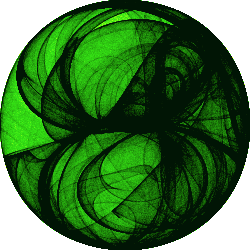

In [7]:
img = tf.shade(agg, cmap = cmaps[7], how='linear', span = [0, n/60000])
img_map(img,"attractorColor1")